# Data Visualization with Python - PyFirenze Meetup 

06/02/2020 - Giacomo Debidda @PyCon PyFirenze

Repo: https://github.com/jackdbd/python-firenze-meetup-202-02-06

## Table of Contents <a name="toc"></a>

- [Find the data](#find-the-data)
- [Line chart](#line-chart)
- [Bar chart](#bar-chart)
- [Tidy data](#tidy-data)
- [Exploratory Data Analysis (EDA) in 5 minutes](#eda)
- [Grammar Of Graphics](#grammar-of-graphics)
- [Colors and colormaps](#colors)
- [Chartjunk](#chartjunk)

In [1]:
import numpy as np
import pandas as pd

np.__version__, pd.__version__

('1.18.1', '0.25.3')

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

mpl.__version__, sns.__version__, alt.__version__

('3.1.1', '0.9.0', '4.0.1')

In [3]:
np.set_printoptions(precision=2, suppress=True)
pd.options.display.max_rows = 20

In [4]:
import inspect

def public_modules(py_lib):    
    return [tup[0] for tup in inspect.getmembers(py_lib, inspect.ismodule) if tup[0][0] != '_']
    
def public_functions(py_lib):
    return [tup[0] for tup in inspect.getmembers(py_lib, inspect.isfunction) if tup[0][0] != '_']

def reset_aesthetics():
    mpl.rcParams.update(mpl.rcParamsDefault)
    sns.set()

In [5]:
# improve altair plots
# https://github.com/jackdbd/reddit-dataviz-battle-2018-08
# public_functions(alt)
# public_modules(alt)

In [54]:
# currently installed theme will be used to set plot style if no arguments provided
# jtplot.get_theme_style('chesterish')
# https://github.com/dunovank/jupyter-themes#set-plotting-style-from-within-notebook

# jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [56]:
from jupyterthemes import jtplot

jtplot.style()

## Where to find the right data? <a name="find-the-data"></a>

[↑ Back to TOC](#toc)

Before creating a visualization you will need to find some data, ~~analyze it~~, clean it, then analyze it.

### Find

- [real-time, streaming data](https://www.quora.com/Where-can-I-find-public-or-free-real-time-or-streaming-data-sources)
- [GIS data](https://freegisdata.rtwilson.com/)
- [Open data Regione Toscana](http://dati.toscana.it/dataset)
- [Geoblog Regione Toscana](http://geoblog.regione.toscana.it/)
- [kaggle](https://www.kaggle.com/)
- [OpenStreetMap](https://www.openstreetmap.org/)
- [R datasets](https://vincentarelbundock.github.io/Rdatasets/datasets.html)
- [Quandl](https://www.quandl.com/)
- [Open Data on AWS](https://registry.opendata.aws/)
- [GeoDa University of Chicago](https://geodacenter.github.io/data-and-lab//)
- [World Bank Open Data](https://data.worldbank.org/)
- [Stanford large network dataset collection](http://snap.stanford.edu/data/)
- [Awesome Public Datasets](https://github.com/awesomedata/awesome-public-datasets)
- etc...

### Ask

- [Open Data on Stack Exchange](https://opendata.stackexchange.com/)
- [r/datasets subreddit](https://www.reddit.com/r/datasets/)


### Remember

Real world data can be really messy!

- 80% Data wrangling (aka data munging, data jujitsu)
- 20% data visualization

### The easy route

Today we are going to use [PyDataset](https://github.com/iamaziz/PyDataset), which comes with 750+ datasets.

In [7]:
from pydataset import data

## Tidy Data (TODO) <a name="tidy-data"></a>

[↑ Back to TOC](#toc)

According to Hadley Wickham, [tidy data](http://vita.had.co.nz/papers/tidy-data.html)<sup>[1](#footnote-1)</sup> are based on three rules:

1. each variable forms a columns and contains values
2. each observation forms a row
3. each type of observational unit forms a table

A few definitions:

- Variable: A measurement or an attribute. Height, weight, sex, etc.
- Value: The actual measurement or attribute. 152 cm, 80 kg, female, etc.
- Observation: All values measure on the same unit. Each person.

5 types of messy data:

1. Column headers are values, not variable names.
2. Multiple variables are stored in one column.
3. Variables are stored in both rows and columns.
4. Multiple types of observational units are stored in the same table.
5. A single observational unit is stored in multiple tables.


I tidy data permettono di usare la grammar of graphics. Permette di fare grafici molto complessi con pochissimo codice. Ma appunto la precondizione e' che i dati siano tidy.

To tidy it, we need to melt, or stack it. Pag. 6 Tidy data paper. Fai esempio con pandas.

[Tidy data in Python](http://www.jeannicholashould.com/tidy-data-in-python.html)

https://www.theanalysisfactor.com/wide-and-long-data/

https://sejdemyr.github.io/r-tutorials/basics/wide-and-long/

[Wide & Long Data](https://sejdemyr.github.io/r-tutorials/basics/wide-and-long/).

<a name="footnote-1">1</a>: Wickham, Hadley (2010). <em>The Journal of Statistical Software, vol. 59, 2014.</em>

In [8]:
# Violent Crime Rates by US State in 1973 - arrests per 100,000 residents
# data('USArrests', show_doc=True)

In [9]:
df = data('USArrests')
df.shape

(50, 4)

In [10]:
df.head()

Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

The 50 US states represent the index of this dataset. Nothing wrong with that, but it's annoying when plotting the data with Seaborn, so we create a new column from this index.

In [11]:
df['state'] = df.index
df.head()

Murder  Assault  UrbanPop  Rape       state
Alabama       13.2      236        58  21.2     Alabama
Alaska        10.0      263        48  44.5      Alaska
Arizona        8.1      294        80  31.0     Arizona
Arkansas       8.8      190        50  19.5    Arkansas
California     9.0      276        91  40.6  California

In [12]:
df['percent_of_population_in_urban_areas'] = df.UrbanPop
df_wide = df.drop(columns=['UrbanPop'])

df_wide.loc[df_wide['state'] == 'California']

Murder  Assault  Rape       state  \
California     9.0      276  40.6  California   

            percent_of_population_in_urban_areas  
California                                    91

This is a dataset in the **wide** format, a messy dataset. Column headers `Assault`, `Murder`, `Rape` are values, not variable names.

To clean this dataset we **melt** it. This will create a **molten** dataset which is the **long** format.

In [13]:
df_long = df_wide.melt(
    id_vars=['state', 'percent_of_population_in_urban_areas'],
    value_vars=['Assault', 'Murder', 'Rape'],
    var_name='crime',
    value_name='arrests_per_100k'
)

df_long = df_long.sort_values(by=['state'])

df_long.loc[df_long['state'] == 'California']

state  percent_of_population_in_urban_areas    crime  \
104  California                                    91     Rape   
4    California                                    91  Assault   
54   California                                    91   Murder   

     arrests_per_100k  
104              40.6  
4               276.0  
54                9.0

In [14]:
df_long.head()

state  percent_of_population_in_urban_areas    crime  arrests_per_100k
0    Alabama                                    58  Assault             236.0
50   Alabama                                    58   Murder              13.2
100  Alabama                                    58     Rape              21.2
1     Alaska                                    48  Assault             263.0
51    Alaska                                    48   Murder              10.0

In [15]:
print('Wide, original, messy dataset', df_wide.shape), print('Long, molten, tidy dataset', df_long.shape);

Wide, original, messy dataset (50, 5)
Long, molten, tidy dataset (150, 4)


## Grouped bar chart <a name="bar-chart"></a>

[Back to TOC](#toc)

`state` is a categorical variable. `arrests_per_100k` is a numerical variable. The most appropriate plot for this data is the [barplot](https://python-graph-gallery.com/barplot/).

We also want to group `arrests_per_100k` by `state`, so we will create a grouped bar plot (aka multiple bar chart).

A multiple-bar chart should be kept to four or fewer categories<sup>[2](#footnote-2)</sup>.

<a name="footnote-2">2</a>: Wong, Dona M. (2010). <em>The Wall Street Journal Guide to Information Graphics: The Dos and Don'ts of Presenting Data, Facts, and Figures.</em>

In [16]:
condition = \
  (df_long.state == 'California') | \
  (df_long.state == 'Illinois') | \
  (df_long.state == 'New Jersey') | \
  (df_long.state == 'Texas')

In [17]:
df_4 = df_long.loc[condition]
df_4

state  percent_of_population_in_urban_areas    crime  \
104  California                                    91     Rape   
4    California                                    91  Assault   
54   California                                    91   Murder   
62     Illinois                                    83   Murder   
112    Illinois                                    83     Rape   
12     Illinois                                    83  Assault   
29   New Jersey                                    89  Assault   
79   New Jersey                                    89   Murder   
129  New Jersey                                    89     Rape   
142       Texas                                    80     Rape   
42        Texas                                    80  Assault   
92        Texas                                    80   Murder   

     arrests_per_100k  
104              40.6  
4               276.0  
54                9.0  
62               10.4  
112              24.0  
12              249.0  
29              159.0  
79                7.4  
129              18.8  
142              25.5  
42              201.0  
92               12.7

The standard pandas plot function is not enough.

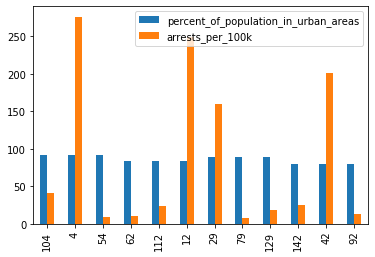

In [18]:
df_4.plot(kind='bar');

Not even if we add some labels.

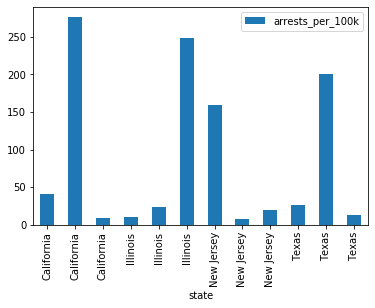

In [19]:
df_4.plot(kind='bar', x='state', y='arrests_per_100k');

We *could* create a [grouped bar chart with matplotlib](https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py). But it's quicker to use Seaborn or Altair for this.

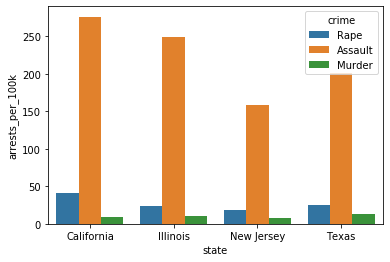

In [20]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(
    data=df_4,
    x='state',
    y='arrests_per_100k',
    hue='crime',
);

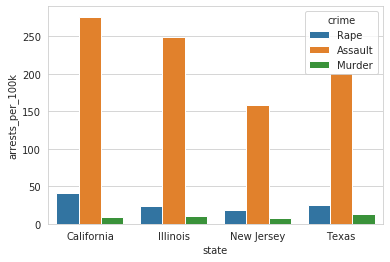

In [21]:
with sns.axes_style('whitegrid'):
    sns.barplot(
        data=df_4,
        x='state',
        y='arrests_per_100k',
        hue='crime',
    );

Let's make it a little better.

The ranking of bars should be respected. This is particularly important for horizontal bar charts.

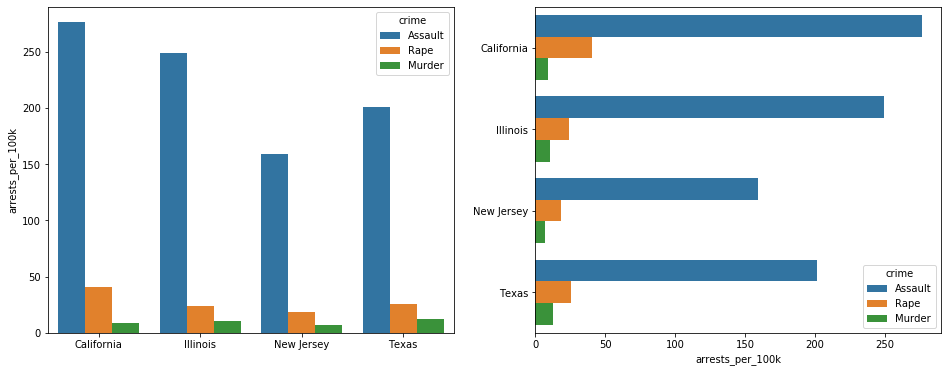

In [22]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# sns.scatterplot(x = model1.fittedvalues, y = model1.resid, ax=ax1)
sns.barplot(
    ax=ax0,
    data=df_4,
    x='state',
    y='arrests_per_100k',
    hue='crime',
    hue_order=['Assault', 'Rape', 'Murder'],
)
ax0.set(xlabel='')

sns.barplot(
    ax=ax1,
    data=df_4,
    x='arrests_per_100k',
    y='state',
    hue='crime',
    hue_order=['Assault', 'Rape', 'Murder'],
    orient='h'
)
ax1.set(ylabel='');

Color can reveal patterns in the data if used effectively or hide those patterns if used poorly, so it's important to pick a good [color palette](https://seaborn.pydata.org/tutorial/color_palettes.html).

Seaborn has a function that can help us with that.

In [23]:
# ?sns.choose_colorbrewer_palette

In [24]:
sns.choose_colorbrewer_palette(data_type='qualitative');

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

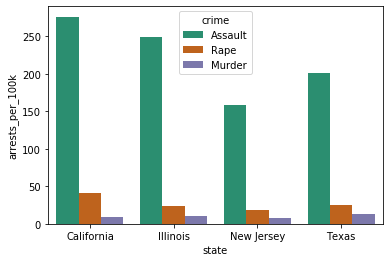

In [25]:
sns.barplot(
    data=df_4,
    x='state',
    y='arrests_per_100k',
    hue='crime',
    hue_order=['Assault', 'Rape', 'Murder'],
    palette='Dark2'
);

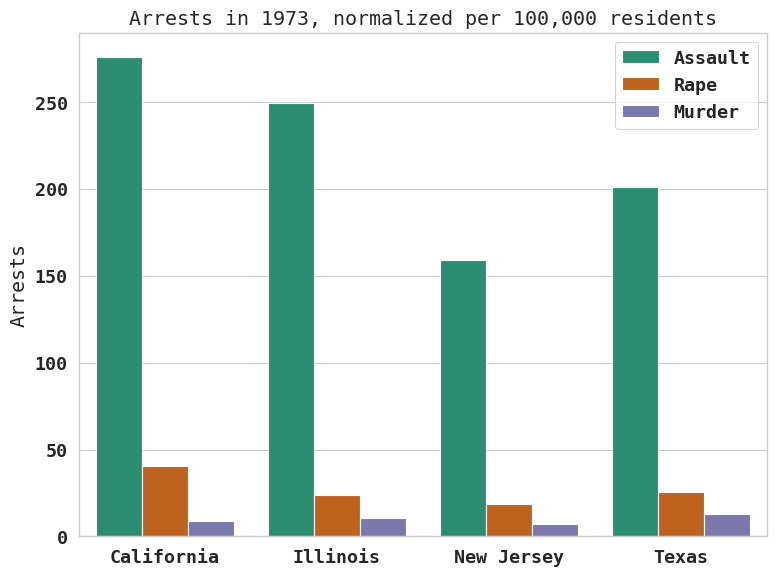

In [26]:
reset_aesthetics()
# Set Seaborn aesthetic parameters
# https://seaborn.pydata.org/generated/seaborn.set.html
sns.set(
    context='paper', # paper, notebook, talk, poster
    font='monospace', # monospace, sans-serif
    font_scale=1.5,
    style="whitegrid",
    rc={'font.weight': 'bold'}
)

fig = plt.figure(figsize=(8, 6))

barplot = sns.barplot(
    data=df_4,
    x='state',
    y='arrests_per_100k',
    hue='crime',
    hue_order=['Assault', 'Rape', 'Murder'],
    palette='Dark2',
)

barplot.set(
    xlabel='',
    ylabel='Arrests',
    title='Arrests in 1973, normalized per 100,000 residents',
)

# Somewhat hacky way to style the legend after it has been added to the plot.
barplot.get_legend().set(title='');

# shave off some margins with Matplotlib's tight_layout
plt.tight_layout()

# fig.savefig('arrests-in-1973.png') # jpg, png, svg

## Exploratory Data Analysis (EDA) in 5 minutes <a name="eda"></a>

[Back to TOC](#toc)

In [632]:
df = data('airquality') 

In [633]:
from pandas_profiling import ProfileReport

profile = ProfileReport(
    df,
    # minimal=True,
    html={'style': {'full_width': True}},
    title='Air Quality in NYC in 1973',
)

profile
# profile.to_file(output_file="my_report.html")

In [635]:
df = data('airquality')
df.sample(3)

Ozone  Solar.R  Wind  Temp  Month  Day
101  110.0    207.0   8.0    90      8    9
56     NaN    135.0   8.0    75      6   25
144   13.0    238.0  12.6    64      9   21

In [637]:
df = data('macro')
df.sample(3)

country  year  gdp  unem  capmob     trade
259  Sweden  1974  3.2   1.5      -1  52.04547
267  Sweden  1982  0.8   3.1      -1  60.16333
253  Sweden  1968  3.6   2.0      -2  42.46237

In [638]:
df.dtypes

country     object
year         int64
gdp        float64
unem       float64
capmob       int64
trade      float64
dtype: object

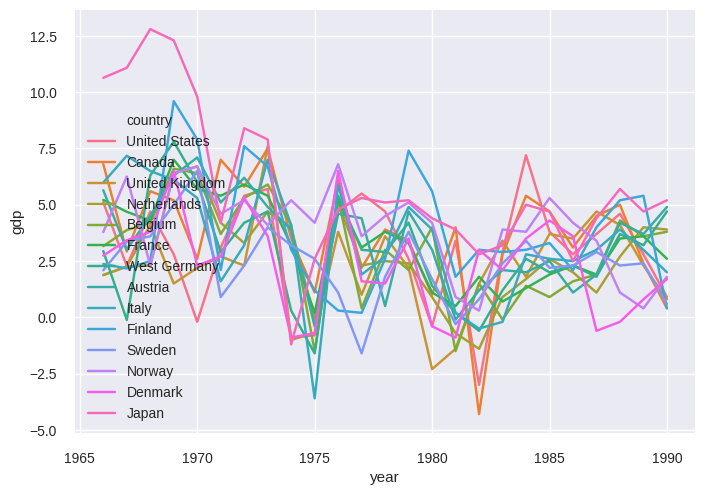

In [643]:
sns.lineplot(
    x='year',
    y='gdp',
    hue='country',
    data=df
);

In [646]:
df = data('HairEyeColor')

print(df.shape)
df.sample(3)

(32, 4)


Hair    Eye     Sex  Freq
13  Black  Green    Male     3
24  Blond   Blue  Female    64
12  Blond  Hazel    Male     5

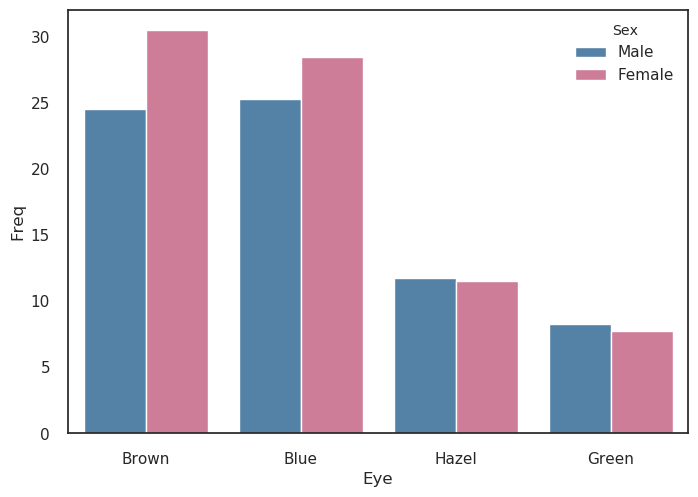

In [648]:
sns.set(style="white")

barplot = sns.barplot(
    data=df,
    x='Eye',
    y='Freq',
    hue='Sex',
    hue_order=['Male', 'Female'],
    palette=['steelblue', 'palevioletred'],
    ci=None, # confidence interval for error bars (not applicable to this dataset)
)

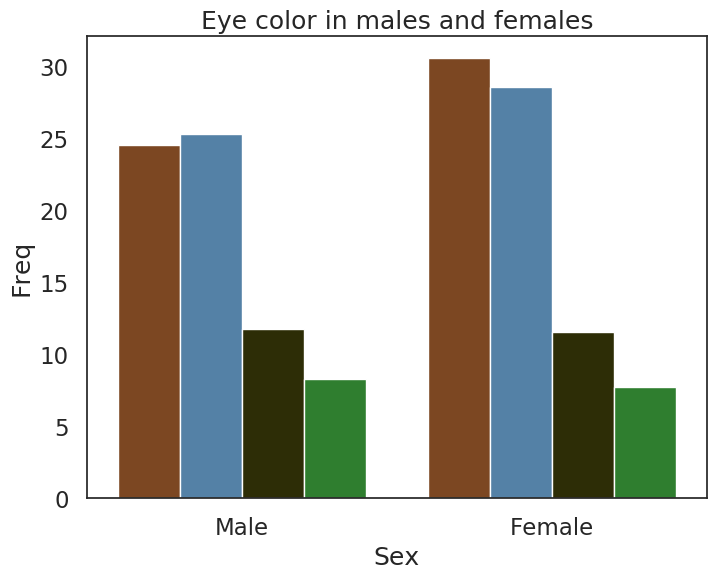

In [651]:
sns.set(style="white", font_scale=1.5)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

barplot = sns.barplot(
    data=df,
    x='Sex',
    y='Freq',
    hue='Eye',
    hue_order=['Brown', 'Blue', 'Hazel', 'Green'],
    palette=['saddlebrown', 'steelblue', '#333300', 'forestgreen'],
    ci=None, # confidence interval for error bars (not applicable to this dataset)
)

barplot.set(title='Eye color in males and females');
# plt.suptitle('Eye color in males and females', size=16)

# Hacky way to remove the legend
ax.get_legend().remove()

In [652]:
# data('USArrests', show_doc=True)

In [27]:
df = data('USArrests')
df.sample(5)

Murder  Assault  UrbanPop  Rape
West Virginia     5.7       81        39   9.3
North Dakota      0.8       45        44   7.3
New York         11.1      254        86  26.1
Tennessee        13.2      188        59  26.9
Wisconsin         2.6       53        66  10.8

In [28]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [30]:
df.loc[df.index == 'Florida']

Murder  Assault  UrbanPop  Rape
Florida    15.4      335        80  31.9

In [31]:
df.sample(5)

Murder  Assault  UrbanPop  Rape
Kentucky           9.7      109        52  16.3
New Hampshire      2.1       57        56   9.5
North Carolina    13.0      337        45  16.1
Utah               3.2      120        80  22.9
Connecticut        3.3      110        77  11.1

In [32]:
# Seaborn has some issue with accepting the DataFrame index as a plot axis,
# so we create a new column. Otherwise we would need to do df.reset_index()
# when plotting this dataset.
df['state'] = df.index

df.sample(5)

Murder  Assault  UrbanPop  Rape          state
New York         11.1      254        86  26.1       New York
Maryland         11.3      300        67  27.8       Maryland
Alaska           10.0      263        48  44.5         Alaska
New Hampshire     2.1       57        56   9.5  New Hampshire
Virginia          8.5      156        63  20.7       Virginia

In [33]:
# This is not tidy data: let's create a new column 'Crime' which melt the Murder, Assault, Rape variables.

In [34]:
df_molten = df.melt(
    id_vars=['state'],
    value_vars=['Assault', 'Murder', 'Rape'],
    var_name='crime',
    value_name='arrests_per_100k'
)

In [35]:
df_molten.loc[df_molten['state'] == 'California']

state    crime  arrests_per_100k
4    California  Assault             276.0
54   California   Murder               9.0
104  California     Rape              40.6

In [36]:
df_molten.loc[df_molten['state'] == 'Florida']

state    crime  arrests_per_100k
8    Florida  Assault             335.0
58   Florida   Murder              15.4
108  Florida     Rape              31.9

In [37]:
murders = df_molten.loc[df_molten.crime == 'Murder']\
  .reset_index(drop=True)\
  .rename(columns={'arrests_per_100k': 'murders_per_100k'})\
  .sort_values(by=['state'])\
  .drop(columns=['crime', 'state'])

print(murders.shape)
murders.head()

(50, 1)


murders_per_100k
0              13.2
1              10.0
2               8.1
3               8.8
4               9.0

In [38]:
ddf = df_molten.groupby(by=['state'], as_index=False)\
  .sum()\
  .sort_values(by=['state'])

print(ddf.shape)
ddf.head()

(50, 2)


state  arrests_per_100k
0     Alabama             270.4
1      Alaska             317.5
2     Arizona             333.1
3    Arkansas             218.3
4  California             325.6

In [39]:
ddf = pd.concat([ddf, murders], axis=1).sort_values(by=['arrests_per_100k'], ascending=False)

ddf.head()

state  arrests_per_100k  murders_per_100k
8          Florida             382.3              15.4
32  North Carolina             366.1              13.0
19        Maryland             339.1              11.3
2          Arizona             333.1               8.1
30      New Mexico             328.5              11.4

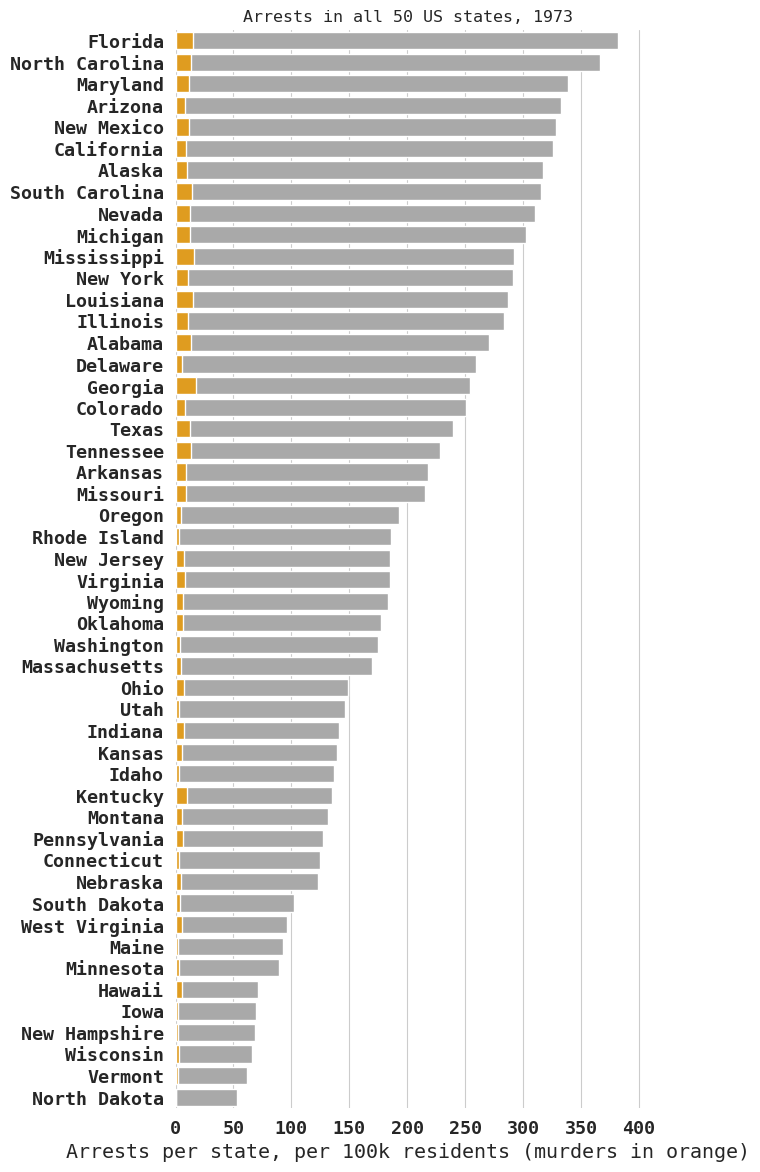

In [40]:
# https://seaborn.pydata.org/examples/horizontal_barplot.html
fig, ax = plt.subplots(figsize=(6, 14))

reset_aesthetics()

sns.set(
    context='notebook', # paper, notebook, talk, poster
    font='sans-serif', # monospace, sans-serif
    font_scale=1.0,
    style='whitegrid',
    rc={'font.weight': 'normal'}
)

sns.barplot(
    x='arrests_per_100k',
    y='state',
    data=ddf,
    label='Total arrests',
    color='darkgrey',
    ci=None,
)

sns.barplot(
    x='murders_per_100k',
    y='state',
    data=ddf,
    label='Murders',
    color='orange',
    ci=None,
)

ax.set(
    ylabel='',
    xlabel='Arrests per state, per 100k residents (murders in orange)',
    title='Arrests in all 50 US states, 1973'
)

sns.despine(left=True, bottom=True)

In [41]:
df_molten.sort_values(by=['arrests_per_100k'])

state    crime  arrests_per_100k
83     North Dakota   Murder               0.8
78    New Hampshire   Murder               2.1
68            Maine   Murder               2.1
64             Iowa   Murder               2.2
94          Vermont   Murder               2.2
61            Idaho   Murder               2.6
98        Wisconsin   Murder               2.6
72        Minnesota   Murder               2.7
93             Utah   Murder               3.2
56      Connecticut   Murder               3.3
88     Rhode Island   Murder               3.4
90     South Dakota   Murder               3.8
96       Washington   Murder               4.0
76         Nebraska   Murder               4.3
70    Massachusetts   Murder               4.4
86           Oregon   Murder               4.9
60           Hawaii   Murder               5.3
97    West Virginia   Murder               5.7
57         Delaware   Murder               5.9
65           Kansas   Murder               6.0
75          Montana   Murder               6.0
87     Pennsylvania   Murder               6.3
85         Oklahoma   Murder               6.6
99          Wyoming   Murder               6.8
63          Indiana   Murder               7.2
84             Ohio   Murder               7.3
133    North Dakota     Rape               7.3
79       New Jersey   Murder               7.4
118           Maine     Rape               7.8
55         Colorado   Murder               7.9
52          Arizona   Murder               8.1
138    Rhode Island     Rape               8.3
95         Virginia   Murder               8.5
53         Arkansas   Murder               8.8
54       California   Murder               9.0
74         Missouri   Murder               9.0
147   West Virginia     Rape               9.3
128   New Hampshire     Rape               9.5
66         Kentucky   Murder               9.7
51           Alaska   Murder              10.0
62         Illinois   Murder              10.4
148       Wisconsin     Rape              10.8
81         New York   Murder              11.1
106     Connecticut     Rape              11.1
144         Vermont     Rape              11.2
114            Iowa     Rape              11.3
69         Maryland   Murder              11.3
80       New Mexico   Murder              11.4
71         Michigan   Murder              12.1
77           Nevada   Murder              12.2
92            Texas   Murder              12.7
140    South Dakota     Rape              12.8
82   North Carolina   Murder              13.0
50          Alabama   Murder              13.2
91        Tennessee   Murder              13.2
111           Idaho     Rape              14.2
89   South Carolina   Murder              14.4
122       Minnesota     Rape              14.9
137    Pennsylvania     Rape              14.9
67        Louisiana   Murder              15.4
58          Florida   Murder              15.4
149         Wyoming     Rape              15.6
107        Delaware     Rape              15.8
73      Mississippi   Murder              16.1
132  North Carolina     Rape              16.1
120   Massachusetts     Rape              16.3
116        Kentucky     Rape              16.3
125         Montana     Rape              16.4
126        Nebraska     Rape              16.5
123     Mississippi     Rape              17.1
59          Georgia   Murder              17.4
115          Kansas     Rape              18.0
129      New Jersey     Rape              18.8
103        Arkansas     Rape              19.5
135        Oklahoma     Rape              20.0
110          Hawaii     Rape              20.2
145        Virginia     Rape              20.7
113         Indiana     Rape              21.0
100         Alabama     Rape              21.2
134            Ohio     Rape              21.4
117       Louisiana     Rape              22.2
139  South Carolina     Rape              22.5
143            Utah     Rape              22.9
112        Illinois     Rape              24.0
142           Texas

In [923]:
# improve altair plots
# https://github.com/jackdbd/reddit-dataviz-battle-2018-08
# public_functions(alt)
# public_modules(alt)

In [84]:
# Because of a bug in Vega-Lite, we have to use a workaround to sort a layered chart
# https://github.com/altair-viz/altair/issues/820#issuecomment-386856394

sort = alt.SortField(field='arrests_per_100k', order='descending')

all_bars = alt.Chart(df_molten).mark_bar().encode(
    alt.X('arrests_per_100k'),
    y=alt.Y('state', sort=sort, axis=alt.Axis(labels=True, ticks=True, title='')),
    color=alt.value('darkgray'),
)

murder_bars = alt.Chart(df_molten).mark_bar().encode(
    x='arrests_per_100k',
    y=alt.Y('state', sort=sort, axis=alt.Axis(labels=False, ticks=False, title='')),
    color=alt.value('orange'),
).transform_filter(
    alt.datum.crime == 'Murder',
)

alt.layer(
    all_bars,
    murder_bars,
    data=df_molten
).resolve_scale(y='independent').resolve_axis(x='independent')

alt.LayerChart(...)

In [43]:
# https://altair-viz.github.io/gallery/stacked_bar_chart.html
alt.Chart(df_molten).mark_bar().encode(
    x='sum(arrests_per_100k)',
    y=alt.Y(
        'state',
        axis=alt.Axis(title=''),
        sort=alt.SortField(field='arrests_per_100k', order='descending')
    ),
    color=alt.Color('crime', scale=alt.Scale(scheme='Dark2')),
)

alt.Chart(...)

In [555]:
# Da fare
# https://altair-viz.github.io/gallery/selection_histogram.html

In [575]:
df = data('quakes')
df.sample(5)

lat    long  depth  mag  stations
633 -28.56  183.59     53  4.4        20
4   -17.97  181.66    626  4.1        19
661 -30.01  180.80    286  4.8        43
143 -13.23  167.10    220  5.0        46
884 -11.70  166.30    139  4.2        15

In [590]:
df.shape

(1000, 5)

In [577]:
import holoviews as hv

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
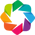

In [583]:
from holoviews import opts, dim
hv.extension('bokeh')

In [599]:
# http://holoviews.org/reference/elements/bokeh/Points.html#bokeh-gallery-points
points = hv.Points(
    data=df,
    kdims=['lat', 'long'],
    vdims=['depth', 'mag']
)
points.opts(color='depth', size='mag')

:Points   [lat,long]   (depth,mag)

In [175]:
?pd.date_range

## Line chart <a name="line-chart"></a>

[Back to TOC](#toc)

A line chart (aka line graph, line plot) displays information as a series of data points called 'markers' connected by straight line segments.

https://www.data-to-viz.com/#line

In [258]:
# Quarterly Earnings per Johnson & Johnson Share, 1960-1980
# data('JohnsonJohnson', show_doc=True)

In [259]:
df = data('JohnsonJohnson')
print(df.shape)

(84, 2)


In [260]:
df.head()

time  JohnsonJohnson
1  1960.00            0.71
2  1960.25            0.63
3  1960.50            0.85
4  1960.75            0.44
5  1961.00            0.61

In [261]:
df.tail()

time  JohnsonJohnson
80  1979.75            9.99
81  1980.00           16.20
82  1980.25           14.67
83  1980.50           16.02
84  1980.75           11.61

In [262]:
datetime_index = pd.date_range(
    start='1960-01',
    end='1980-12',
    freq='BQS', # business quarter start frequency
    # tz='America/New_York',
    name='date',
)

df['date'] = pd.Series(datetime_index)

df = df.drop(columns=['time'])

df.head()

JohnsonJohnson       date
1            0.71 1960-04-01
2            0.63 1960-07-01
3            0.85 1960-10-03
4            0.44 1961-01-02
5            0.61 1961-04-03

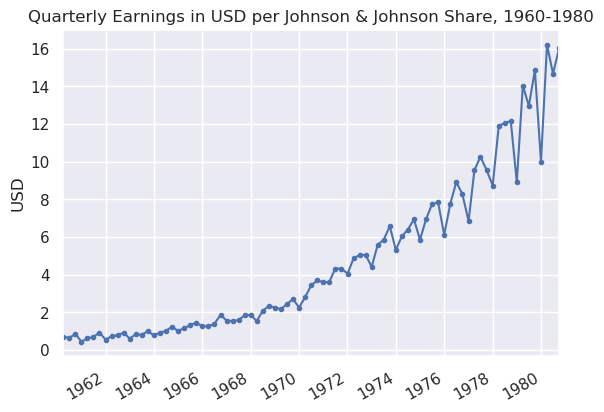

In [285]:
reset_aesthetics()

ax = df.plot(
    x='date',
    y='JohnsonJohnson',
    marker='.',
    title='Quarterly Earnings in USD per Johnson & Johnson Share, 1960-1980',
    legend=False
)

ax.set(xlabel='', ylabel='USD');

In [403]:
# New York Air Quality Measurements
# Daily air quality measurements in New York, May to September 1973.

# Ozone: Mean ozone in parts per billion from 13:00 to 15:00 hours at Roosevelt Island
# Solar.R: Solar radiation in Langleys in the frequency band 4000–7700 Angstroms
#          from 0800 to 1200 hours at Central Park
# Wind: Average wind speed in miles per hour at 0700 and 1000 hours at LaGuardia Airport 
# Temp: Maximum daily temperature in degrees Fahrenheit at La Guardia Airport. 
# data('airquality', True)

df = data('airquality') 
df.shape

(153, 6)

In [404]:
df.head()

Ozone  Solar.R  Wind  Temp  Month  Day
1   41.0    190.0   7.4    67      5    1
2   36.0    118.0   8.0    72      5    2
3   12.0    149.0  12.6    74      5    3
4   18.0    313.0  11.5    62      5    4
5    NaN      NaN  14.3    56      5    5

In [405]:
df.tail()

Ozone  Solar.R  Wind  Temp  Month  Day
149   30.0    193.0   6.9    70      9   26
150    NaN    145.0  13.2    77      9   27
151   14.0    191.0  14.3    75      9   28
152   18.0    131.0   8.0    76      9   29
153   20.0    223.0  11.5    68      9   30

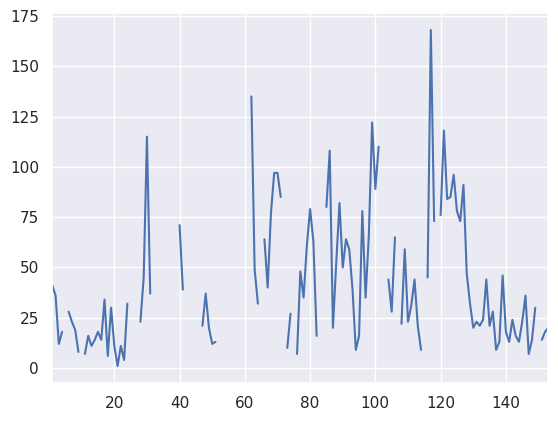

In [406]:
df.Ozone.plot()

In [407]:
datetime_index = pd.date_range(
    start='1973-04-30',
    end='1973-09-30',
    freq='D',
#     tz='America/New_York',
    name='date',
)

df['date'] = pd.Series(datetime_index)

# Altair has some issues with column names with a dot, so we copy the data in a new column.
df['solar_radiation'] = df['Solar.R']

df = df.drop(columns=['Month', 'Day', 'Solar.R'])

df.head()

Ozone  Wind  Temp       date  solar_radiation
1   41.0   7.4    67 1973-05-01            190.0
2   36.0   8.0    72 1973-05-02            118.0
3   12.0  12.6    74 1973-05-03            149.0
4   18.0  11.5    62 1973-05-04            313.0
5    NaN  14.3    56 1973-05-05              NaN

In [408]:
df.tail()

Ozone  Wind  Temp       date  solar_radiation
149   30.0   6.9    70 1973-09-26            193.0
150    NaN  13.2    77 1973-09-27            145.0
151   14.0  14.3    75 1973-09-28            191.0
152   18.0   8.0    76 1973-09-29            131.0
153   20.0  11.5    68 1973-09-30            223.0

As far as I know, Seaborn does not handle missing data (NaNs). This is a problem, the resulting line plot will be misleading.

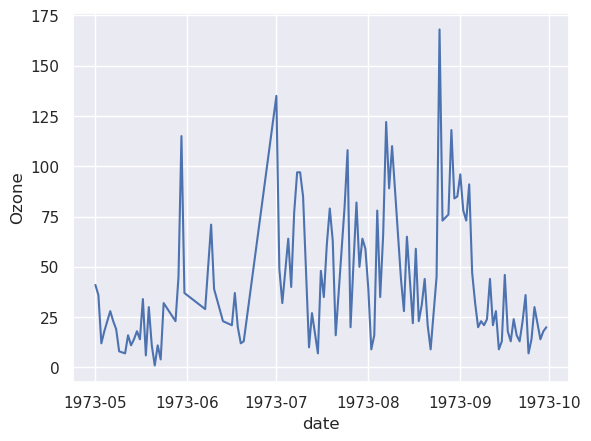

In [409]:
sns.lineplot(
    x="date",
    y="Ozone",
    data=df
)

Altair handles missing data as you would expect.

In [498]:
alt.Chart(df).mark_line().encode(
    x=alt.X('date', axis=alt.Axis(title='')),
    y=alt.Y('Ozone', axis=alt.Axis(title='Ozone (ppb)')),
).properties(
    title='Mean ozone levels at Roosevelt Island',
    width=600
)

alt.Chart(...)

In [499]:
# correlation between ozone, wind and temperature

In [502]:
alt.Chart(df).mark_line().encode(
    x=alt.X('date', axis=alt.Axis(title='')),
    y=alt.Y('solar_radiation', axis=alt.Axis(title='Solar radiation (Langleys)')),
).configure_mark(
    color='orange',
).properties(
    title='Solar radiation in Central Park, frequency band 4000–7700 Angstroms',
    width=600
)

alt.Chart(...)

Altair plots are highly customizable, but the syntax is not that straightforward.

In [526]:
# https://altair-viz.github.io/user_guide/marks.html#mark-properties

alt.Chart(df).transform_fold(
    fold=['Ozone', 'solar_radiation'],
    as_=['Air Quality Measurement', 'value'],
).mark_line(interpolate='linear').encode(
    x=alt.X('date:T', axis=alt.Axis(title='')),
    y=alt.Y(
        'value:Q',
        axis=alt.Axis(
            title='Ozone (ppb)' if 'Air Quality Measurement' == 'Ozone' else 'Solar radiation (Langleys)',
        ),
    ),
    row=alt.Row('Air Quality Measurement:N'),  
    color=alt.Color('Air Quality Measurement:N')
).configure_axisX(
    grid=False,
    ticks=True,
).properties(
    width=600,
    height=200,
    title='Daily Air Quality Measurements in NYC, May - September 1973'
)

alt.Chart(...)

In [85]:
# Reaction times in a sleep deprivation study

# Reaction: Average reaction time (ms)
# Days: Number of days of sleep deprivation
# Subject: Subject number on which the observation was made
# data('sleepstudy', show_doc=True)

df = data('sleepstudy')
df.shape

(180, 3)

In [86]:
df.sample(3)

Reaction  Days  Subject
154  240.4730     3      370
134  346.8555     3      352
170  369.4692     9      371

Seaborn does not include the zero-point in quantitative axes. This is risky, the baseline should almost always be zero.

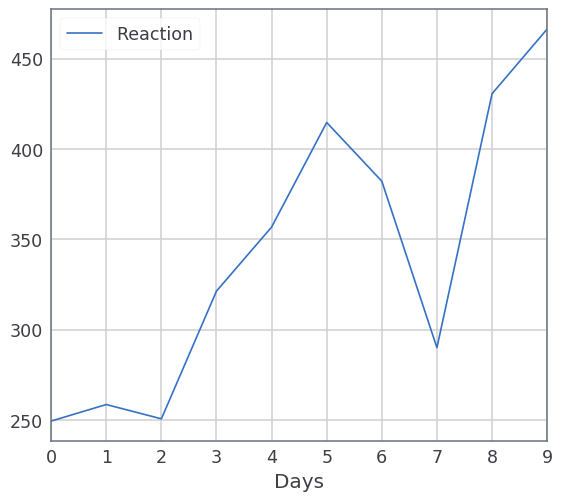

In [87]:
df.loc[df.Subject == 308].plot(x='Days', y='Reaction');

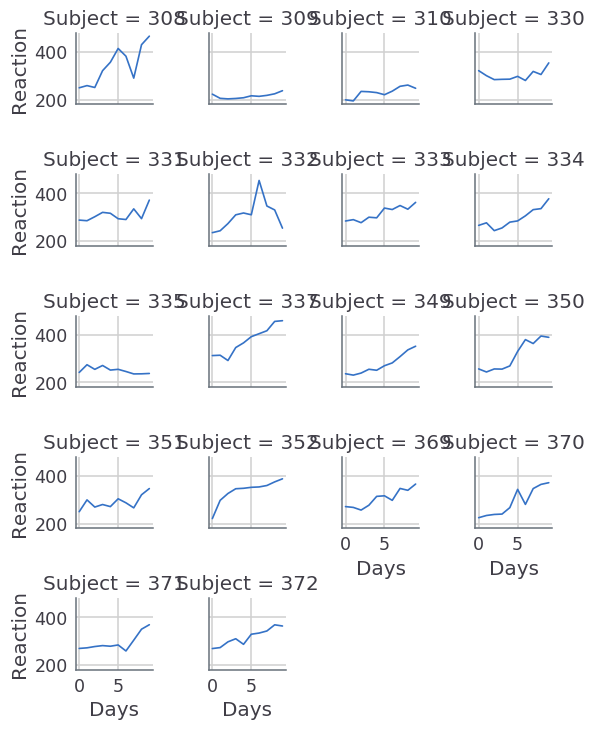

In [88]:
grid = sns.FacetGrid(df, col='Subject', col_wrap=4, height=1.5)
grid.map(plt.plot, 'Days', 'Reaction');

Altair inherits from Vega-Lite the convention of always including the zero-point in quantitative axes.

In [89]:
alt.Chart(df).mark_line().encode(
    x=alt.X('Days:O', title=''),
    y=alt.Y(
        'Reaction:Q',
        title='',
#         scale=alt.Scale(zero=False),
#         scale=alt.Scale(domain=(200, 500))
    ),
    facet=alt.Facet('Subject:O', columns=3),
).properties(
    title='Reaction times (ms) for sleep-deprived subjects over 10 days (ms)',
    width=200,
    height=100
)

alt.Chart(...)

Nonetheless, Altair allows us to use a different domain if we specify it. For example, here we can specify a narrower domain to highlight the differences across the 18 subjects.

In [115]:
alt.Chart(df).mark_line().encode(
    x=alt.X('Days:O', title=''),
   # scale=alt.Scale(zero=False),
    y=alt.Y('Reaction:Q', title='', scale=alt.Scale(domain=(200, 450))),
    color=alt.condition(
        alt.datum['Reaction'] > 300, # How do I test for the condition: is max(reaction) > 350 ms at least once during the study?
        alt.value('orange'),
        alt.value('darkgray')
    ),
    facet=alt.Facet('Subject:O', columns=3, title=''),
).properties(
    title='Reaction times (ms) for sleep-deprived subjects over 10 days',
    width=200,
    height=100
)

alt.Chart(...)

## Regression

In [955]:
df = data('trees')

print(df.shape)
df.head()

(31, 3)


Girth  Height  Volume
1    8.3      70    10.3
2    8.6      65    10.3
3    8.8      63    10.2
4   10.5      72    16.4
5   10.7      81    18.8

In [962]:
# Define the degree of the polynomial fits
degree_list = [1, 3, 5]

base = alt.Chart(df).mark_circle(color="black").encode(
        alt.X('Height'), alt.Y('Girth')
)

polynomial_fit = [
    base.transform_regression(
        'Height', 'Girth', method='poly', order=order, as_=['x', str(order)]
    )
    .mark_line()
    .transform_fold([str(order)], as_=['degree', 'y'])
    .encode(alt.Color("degree:N"))
    for order in degree_list
]

alt.layer(base, *polynomial_fit)
# base

alt.LayerChart(...)

In [963]:
polynomial_fit

[alt.Chart(...), alt.Chart(...), alt.Chart(...)]

In [961]:
# Generate some random data
rng = np.random.RandomState(1)
x = rng.rand(40) ** 2
y = 10 - 1.0 / (x + 0.1) + rng.randn(40)
source = pd.DataFrame({"x": x, "y": y})

# Define the degree of the polynomial fits
degree_list = [1, 3, 5]

base = alt.Chart(source).mark_circle(color="black").encode(
        alt.X("x"), alt.Y("y")
)

polynomial_fit = [
    base.transform_regression(
        "x", "y", method="poly", order=order, as_=["x", str(order)]
    )
    .mark_line()
    .transform_fold([str(order)], as_=["degree", "y"])
    .encode(alt.Color("degree:N"))
    for order in degree_list
]

alt.layer(base, *polynomial_fit)

alt.LayerChart(...)

In [160]:
## maps
data('quakes')

## questa la faccio bao, e' la marcia dei soldati Napoleone
data('Minard.cities')
data('Minard.troops')
data('Minard.temp')

## anche questo, la mappa di colera di John Snow
data('Snow.deaths')
data('Snow.polygons')
data('Snow.streets')
data('Snow.pumps');

In [67]:
## regression, boxplot, other statistical plots
data('agefat')
data('trees');

In [73]:
## contour plot, geoview, o anche solo altair
data('brambles')
data('volcano');

In [94]:
## synthetic data, utile per vedere se i plot sono come ci si aspetta o per provare fisher-jenks
# https://pbpython.com/natural-breaks.html
data('xclara'); # Bivariate Data Set with 3 Clusters

In [100]:
## dataset con tante variabili
data('movies')
data('mpg')
data('PD');

In [114]:
## polar-area graphs (sometimes called "Coxcombs" or rose diagrams
# https://datavizcatalogue.com/methods/nightingale_rose_chart.html
data('Nightingale');

In [123]:
## Sabermetrics
data('Baseball');
data('Hitters') # dedotto da 'Baseball'

In [ ]:
## pie chart
data('Bundestag2005') # over map? Cerca quello di Moritz Stefaner

In [139]:
df.describe()

Var1 Var2 Var3 Var4 Var5
count     0    0    0    0    0
unique    0    0    0    0    0
top     NaN  NaN  NaN  NaN  NaN
freq    NaN  NaN  NaN  NaN  NaN

## Grammar of Graphics (TODO) <a name="grammar-of-graphics"></a>

[↑ Back to TOC](#toc)

In a language, a grammar is a set of rules that defines the structure and interpretation of sentences.

A grammar of graphics provides a structure to combine graphical elements into figures that display data in a meaningful way. With a grammar we can describe and construct a wide range of statistical graphics.

Proposed by Leland Wilkinson's [The Grammar of Graphics](https://www.goodreads.com/book/show/2549408.The_Grammar_of_Graphics) in 2000.

First implementation in [SYSTAT](https://en.wikipedia.org/wiki/SYSTAT_(software)) (developed by Wilkinson himself), then Java.

Hadley Wickham published [A Layered Grammar of Graphics](http://vita.had.co.nz/papers/layered-grammar.html) in 2010, then created the R package [ggplot2](https://www.rdocumentation.org/packages/ggplot2/versions/3.2.1).

The grammar of graphics separates a graphic into different layers. Each layer contains a piece of the graphic.

ggplot2 allows you to create graphs that represent both univariate and multivariate numerical and categorical data in a straightforward manner. Grouping can be represented by color, symbol, size, and transparency. The creation of trellis plots (i.e., conditioning) is relatively simple.

[combine graphical primitives](https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf)

| ![Layers in a grammar of graphics](./images/grammar-of-graphics-1.png "Each layer contains a piece of the graphic: geometric objects, scales and coordinate system, plot annotations.") |
|:--:|
| *Each layer contains a piece of the graphic: geometric objects, scales and coordinate system, plot annotations.* |

---

| ![The layers combined](./images/grammar-of-graphics-2.png "The layers combined in the final graphic.") | 
|:--:| 
| *The layers combined in the final graphic.* |

But what is in a layer? Let’s think about an example. Say we have a dataset with an independent variable, x, and a dependent variable, y. If we perform a simple linear regression, we can also calculate the predicted values for y at specific values of x (we can call these predictions y’). Using these data, we want to make a scatterplot with a line of best fit. What are the elements of this plot?

We have:

- The data itself (x, y, and the best fit prediction, y’)
- Dots on the scatterplot representing the relationship between x and y
- The line representing the relationship between x and y’ (the line of best fit)
- The scaling of the data (linear)
- The coordinate system (Cartesian)

What if we want to make a histogram of the distribution of x? Then we have:

- The data itself (x)
- Bars representing the frequency of x at different values of x
- The scaling of the data (linear)
- The coordinate system (Cartesian)

## Colors and colormaps <a name="colors"></a>

[↑ Back to TOC](#toc)

Visual perception

- [How The Rainbow Color Map Misleads](https://eagereyes.org/basics/rainbow-color-map)
- [Rainbow Colormaps – What are they good for? Absolutely nothing!](http://medvis.org/2012/08/21/rainbow-colormaps-what-are-they-good-for-absolutely-nothing/)
- [How Bad Is Your Colormap? (Or, Why People Hate Jet – and You Should Too)](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/)
- [Color blindness simulator](http://colororacle.org/usage.html)

[Cynthia A. Brewer](http://www.personal.psu.edu/cab38/)

[Color Brewer 2.0](http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3)

Color schemese can be:

- sequential
- diverging
- qualitative

<table>
  <tr>
    <th style='text-align: left;'>Color Brewer 2.0</th>
  </tr>
  <tr>
    <td><img alt="Color Brewer 2.0" src="./images/color-brewer.png" title="Color Brewer 2.0" width="800px" /></td>
  </tr>
  <tr>
    <td><em>Color Brewer 2.0</em></td>
  </tr>
</table>

| [![d3-scale-chromatic example](https://static.observableusercontent.com/thumbnail/c680595bf8b26e4cb6bf2306c222a2ba9146f41dc0549c54e0b709a57d94cc87.jpg)](https://observablehq.com/@d3/color-schemes?collection=@d3/d3-scale-chromatic "Color schemes, ready for copy & paste") |
|:--:|
| *Color schemes, ready for copy & paste* |

| [![A Better Default Colormap for Matplotlib (SciPy 2015), by Nathaniel Smith and Stéfan van der Walt](./images/colormap-1.png)](https://youtu.be/xAoljeRJ3lU "A Better Default Colormap for Matplotlib (SciPy 2015), by Nathaniel Smith and Stéfan van der Walt") |
|:--:|
| *A Better Default Colormap for Matplotlib (SciPy 2015), by Nathaniel Smith and Stéfan van der Walt* |

In [251]:
%%time
import time
for _ in range(100):
    time.sleep(0.01) 

CPU times: user 7.77 ms, sys: 0 ns, total: 7.77 ms
Wall time: 1.04 s


In [254]:
# %prun public_modules(sns)

## Chartjunk (TODO) <a name="chartjunk"></a>

[↑ Back to TOC](#toc)

All visual elements in charts and graphs that are not necessary to comprehend the information represented on the graph, or that distract the viewer from this information.<sup>[1](#myfootnote-1)</sup>

https://en.wikipedia.org/wiki/Chartjunk

There is a cool website.

https://junkcharts.typepad.com/junk_charts/2014/08/welcome.html

He is a data visualization critic. For example, read this analysis.

https://junkcharts.typepad.com/junk_charts/2019/12/this-excel-chart-looks-standard-but-gets-everything-wrong.html

WTF Visualizations https://viz.wtf/

<a name="footnote-1">1</a>: Tufte, Edward R. (1983). The Visual Display of Quantitative Information.



## Seaborne

[Gallery](https://seaborn.pydata.org/examples/index.html) and [API Reference](https://seaborn.pydata.org/api.html).

In [180]:
# print(public_modules(sns))
# print(public_functions(sns))

In [188]:
tips = sns.load_dataset("tips")

In [193]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [206]:
# tips.ndim
# tips.columns
tips.shape

(244, 7)

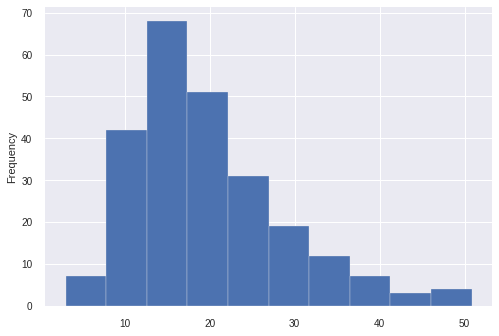

In [244]:
tips.total_bill.plot(kind='hist')

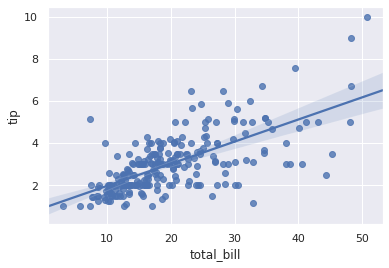

In [18]:
sns.regplot(x="total_bill", y="tip", data=tips);

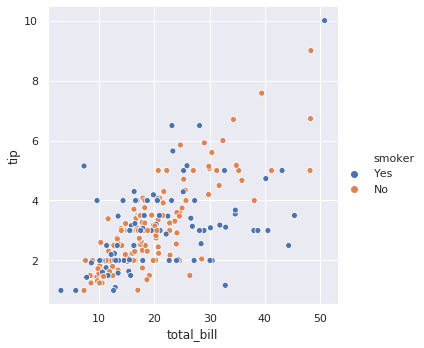

In [19]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

In [11]:
# https://github.com/olgabot/prettyplotlib

# sns.set(style='ticks', palette='Set2')
# sns.despine()

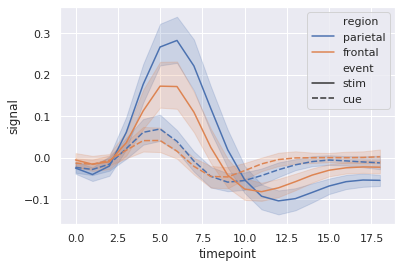

In [12]:
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [235]:
# import holoviews as hv
# from holoviews import opts

# hv.extension('bokeh')

In [4]:
data = [('one',8),('two', 10), ('three', 16), ('four', 8), ('five', 4), ('six', 1)]
bars = hv.Bars(data, hv.Dimension('Car occupants'), 'Count')
bars

:Bars   [Car occupants]   (Count)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
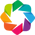

In [5]:
from bokeh.sampledata.les_mis import data

hv.extension('bokeh')
hv.output(size=200)

In [6]:
from holoviews.operation import histogram

points = hv.Points(np.random.randn(100,2))
points.hist(dimension=['x','y'])

points2 = hv.Points(np.random.randn(100,2)*2+1)

xhist, yhist = (histogram(points2, bin_range=(-5, 5), dimension=dim) *
                histogram(points,  bin_range=(-5, 5), dimension=dim) 
                for dim in 'xy')

composition = (points2 * points) << yhist.opts(width=125) << xhist.opts(height=125)
composition.opts(opts.Histogram(alpha=0.3))

:AdjointLayout
   :Overlay
      .Points.I  :Points   [x,y]
      .Points.II :Points   [x,y]
   :Overlay
      .Histogram.I  :Histogram   [y]   (y_frequency)
      .Histogram.II :Histogram   [y]   (y_frequency)
   :Overlay
      .Histogram.I  :Histogram   [x]   (x_frequency)
      .Histogram.II :Histogram   [x]   (x_frequency)

In [11]:
import altair as alt

In [12]:
from vega_datasets import data

source = data.movies.url

alt.Chart(source).mark_bar().encode(
    alt.X("IMDB_Rating:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [13]:
import altair as alt
from vega_datasets import data

source = data.wheat()

base = alt.Chart(source).encode(x='year:O')

bar = base.mark_bar().encode(y='wheat:Q')

line =  base.mark_line(color='red').encode(
    y='wages:Q'
)

(bar + line).properties(width=600)

alt.LayerChart(...)

In [14]:
from vega_datasets import data

chart = alt.Chart(data.cars.url).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N',
)

chart

alt.Chart(...)

In [15]:
data.cars.url

'https://vega.github.io/vega-datasets/data/cars.json'

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.DataFrame(
    np.random.rand(100, 5),
    columns=['a', 'b', 'c', 'd', 'e']
)

In [2]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [3]:
profile

## Data Visualization: tech + design (TODO)

[What is a senior data visualization engineer](https://medium.com/@Elijah_Meeks/what-is-a-senior-data-visualization-engineer-eb032996297)

- Technically, you need to be able to reproduce any chart you see.
- Theoretically, you need to be able to understand the fundamental principles of visual display of information. You need to know the most effective ways to encode information into graphics.
- Practically, you need to think of yourself as a designer first. Finding out what your readers want. This touches on interaction design, information design and graphic design. That's a lot of design.

FOCUS ON YOUR AUDIENCE, NOT (JUST) THE QUESTION.
Un analista si occupa della domanda, ma un data visualization practitioner si deve anche occupare sopratutto della sua audience.

## How to pick the right chart

- [From Data to Viz](https://www.data-to-viz.com/)
- [The Python Graph Gallery](https://python-graph-gallery.com/)